<a href="https://colab.research.google.com/github/Dogdriip/dg-univ-2020-ml/blob/main/v1_2_3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# v1.2.3.3

In [1]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline 
import warnings
warnings.filterwarnings(action='ignore')

!pip install missingpy
from missingpy import MissForest

from scipy import stats
from scipy.stats import norm, skew #for some statistics

     |████████████████████████████████| 51kB 4.9MB/s 


In [3]:
train = pd.read_csv('/content/drive/My Drive/dg_univ_2020_ml/train.csv')
test = pd.read_csv('/content/drive/My Drive/dg_univ_2020_ml/test.csv')

In [4]:
print(train.shape)
print(test.shape)

(11769, 15)
(5789, 13)


In [5]:
train.head()

,no,모델명,연월,연식,연료,주행거리,인승,최대출력(마력),기통,최대토크(kgm),구동방식,자동수동,국산/수입,신차가(만원),가격(만원)
0,0,기아 더 뉴 K7 2.4 GDI 프레스티지 스페셜,12/12(13년형),2013.0,가솔린,4만km,NaN,201.0,4.0,25.5,FF,NaN,국산,3141.0,1870.0
1,1,현대 YF쏘나타 2.0 Y20 LPi 프리미어,10/03,2010.0,LPG,9만km,NaN,157.0,NaN,20.0,FF,NaN,국산,NaN,700.0
2,2,현대 그랜져HG 220 디젤 프리미엄,14/09(15년형),2015.0,디젤,3만km,NaN,202.0,4.0,45.0,FF,NaN,국산,3389.0,2990.0
3,3,쌍용 뉴카이런 2.0 LV5 2WD 고급형,07/06(08년형),2008.0,디젤,16만km,NaN,151.0,4.0,33.8,FR,NaN,국산,2499.0,420.0
4,4,현대 뉴스타렉스 점보 밴 TCI 3인승 GX 윈도우밴 일반형,04/03,2004.0,디젤,16만km,3.0,103.0,NaN,24.0,FR,수동,국산,1445.0,450.0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11769 entries, 0 to 11768
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   no         11769 non-null  int64  
 1   모델명        11769 non-null  object 
 2   연월         11769 non-null  object 
 3   연식         11769 non-null  float64
 4   연료         11769 non-null  object 
 5   주행거리       11769 non-null  object 
 6   인승         765 non-null    float64
 7   최대출력(마력)   10644 non-null  float64
 8   기통         8698 non-null   float64
 9   최대토크(kgm)  10545 non-null  float64
 10  구동방식       10808 non-null  object 
 11  자동수동       1313 non-null   object 
 12  국산/수입      11769 non-null  object 
 13  신차가(만원)    9544 non-null   float64
 14  가격(만원)     11769 non-null  float64
dtypes: float64(7), int64(1), object(7)
memory usage: 1.3+ MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5789 entries, 0 to 5788
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   no         5789 non-null   int64  
 1   모델명        5789 non-null   object 
 2   연월         5789 non-null   object 
 3   연식         5789 non-null   float64
 4   연료         5789 non-null   object 
 5   주행거리       5789 non-null   object 
 6   인승         389 non-null    float64
 7   최대출력(마력)   5237 non-null   float64
 8   기통         4275 non-null   float64
 9   최대토크(kgm)  5183 non-null   float64
 10  구동방식       5312 non-null   object 
 11  자동수동       665 non-null    object 
 12  국산/수입      5789 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 588.1+ KB


# Translate all column name to English

In [8]:
train.columns = ['no', 'modelname', 'ym', 'yeartype', 'fuel', 'dist', 'people', 'power', 'cylinder', 'torque', 'type', 'mission', 'country', 'newprice', 'price']
test.columns = ['no', 'modelname', 'ym', 'yeartype', 'fuel', 'dist', 'people', 'power', 'cylinder', 'torque', 'type', 'mission', 'country']

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11769 entries, 0 to 11768
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   no         11769 non-null  int64  
 1   modelname  11769 non-null  object 
 2   ym         11769 non-null  object 
 3   yeartype   11769 non-null  float64
 4   fuel       11769 non-null  object 
 5   dist       11769 non-null  object 
 6   people     765 non-null    float64
 7   power      10644 non-null  float64
 8   cylinder   8698 non-null   float64
 9   torque     10545 non-null  float64
 10  type       10808 non-null  object 
 11  mission    1313 non-null   object 
 12  country    11769 non-null  object 
 13  newprice   9544 non-null   float64
 14  price      11769 non-null  float64
dtypes: float64(7), int64(1), object(7)
memory usage: 1.3+ MB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5789 entries, 0 to 5788
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   no         5789 non-null   int64  
 1   modelname  5789 non-null   object 
 2   ym         5789 non-null   object 
 3   yeartype   5789 non-null   float64
 4   fuel       5789 non-null   object 
 5   dist       5789 non-null   object 
 6   people     389 non-null    float64
 7   power      5237 non-null   float64
 8   cylinder   4275 non-null   float64
 9   torque     5183 non-null   float64
 10  type       5312 non-null   object 
 11  mission    665 non-null    object 
 12  country    5789 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 588.1+ KB


In [11]:
# sns.heatmap(train.isnull(), cbar=False)

In [12]:
# sns.heatmap(test.isnull(), cbar=False)

In [13]:
train_no = train['no']
test_no = test['no']
train = train.drop(['no'], axis=1)
test = test.drop(['no'], axis=1)

# Getting started (All columns here)
```
0   no         11769 non-null  int64    
1   모델명        11769 non-null  object   
2   연월         11769 non-null  object   
3   연식         11769 non-null  float64  
4   연료         11769 non-null  object   
5   주행거리       11769 non-null  object   
6   인승         765 non-null    float64  
7   최대출력(마력)   10644 non-null  float64  
8   기통         8698 non-null   float64  
9   최대토크(kgm)  10545 non-null  float64  
10  구동방식       10808 non-null  object   
11  자동수동       1313 non-null   object   
12  국산/수입      11769 non-null  object   
13  신차가(만원)    9544 non-null   float64  
14  가격(만원)     11769 non-null  float64  
```

```
0   no         11769 non-null  int64  
1   modelname  11769 non-null  object 
2   ym         11769 non-null  object 
3   yeartype   11769 non-null  float64
4   fuel       11769 non-null  object 
5   dist       11769 non-null  object 
6   people     765 non-null    float64
7   power      10644 non-null  float64
8   cylinder   8698 non-null   float64
9   torque     10545 non-null  float64
10  type       10808 non-null  object 
11  mission    1313 non-null   object 
12  country    11769 non-null  object 
13  newprice   9544 non-null   float64
14  price      11769 non-null  float64
```

# Outlier check, remove

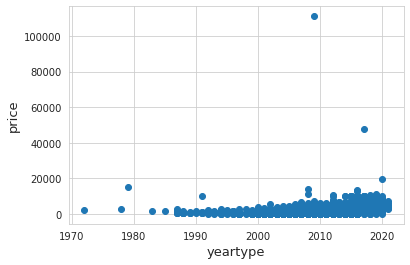

In [14]:
fig, ax = plt.subplots()
ax.scatter(x=train['yeartype'], y=train['price'])
plt.xlabel('yeartype', fontsize=13)
plt.ylabel('price', fontsize=13)
plt.show()

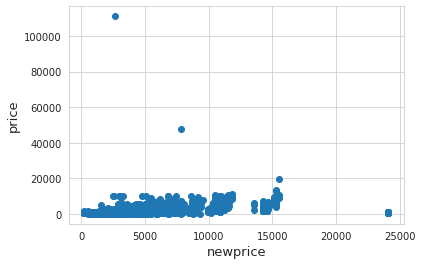

In [15]:
fig, ax = plt.subplots()
ax.scatter(x=train['newprice'], y=train['price'])
plt.xlabel('newprice', fontsize=13)
plt.ylabel('price', fontsize=13)
plt.show()

In [16]:
train = train.drop(train[(train['price'] > 40000)].index)

In [17]:
train[(train['price'] > 40000)]

,modelname,ym,yeartype,fuel,dist,people,power,cylinder,torque,type,mission,country,newprice,price


# More inspection at price (apply log1p)


 mu = 1459.69 and sigma = 1374.79



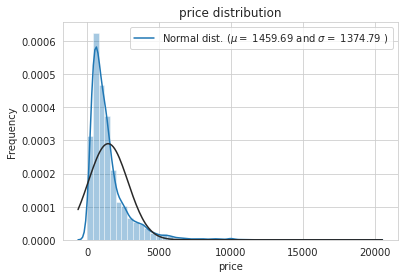

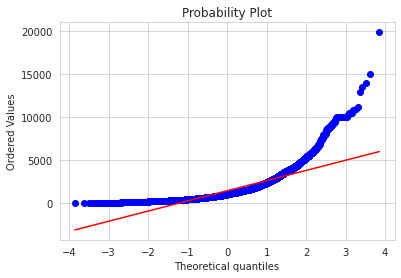

In [18]:
sns.distplot(train['price'], fit=norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['price'], plot=plt)
plt.show()

In [19]:
train["price"] = np.log1p(train["price"])


 mu = 6.94 and sigma = 0.88



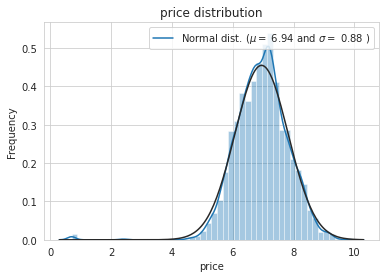

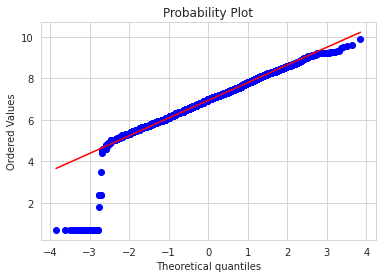

In [20]:
sns.distplot(train['price'], fit=norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['price'], plot=plt)
plt.show()

# Correlation Matrix

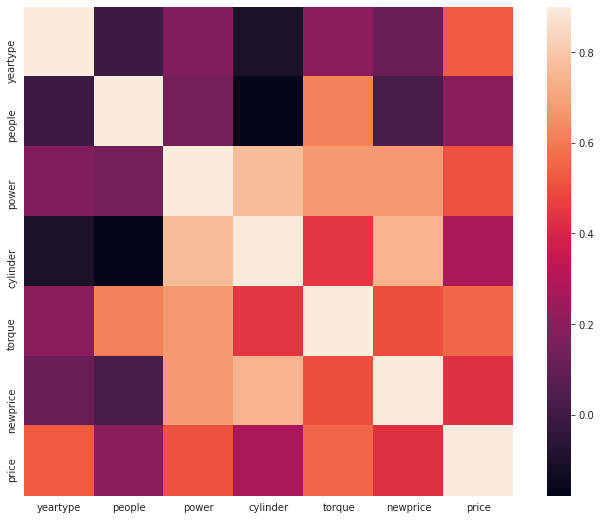

In [21]:
#Correlation map to see how features are correlated with SalePrice
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

# 1 모델명 modelname 11769 non-null object

- 역시 이번에도 모델명은 날리자

In [22]:
train = train.drop(['modelname'], axis=1)
test = test.drop(['modelname'], axis=1)

print(train.shape)
print(test.shape)

(11767, 13)
(5789, 11)


# 2 연월 ym 11769 non-null object

- 생각해보면, 그리고 데이터 명세 다시 보니까,
- 어차피 연식(yeartype)에 있는 정보다
- 이거 날리자

In [23]:
train = train.drop(['ym'], axis=1)
test = test.drop(['ym'], axis=1)

print(train.shape)
print(test.shape)

(11767, 12)
(5789, 10)


# 3 연식 yeartype 11769 non-null float64

건들지 말자

# 4 연료 fuel 11769 non-null object

- 범주형
- 이거 생각 좀 해보자
- 그냥 큰 범주로 산입할까?

In [24]:
train_fuel = train['fuel']
test_fuel = test['fuel']

In [25]:
print(train_fuel.value_counts())
print()
print(test_fuel.value_counts())

가솔린          6669
디젤           3967
LPG           934
가솔린+전기         79
가솔린/LPG겸용      41
기타             32
전기             24
LPG+전기         14
가솔린/CNG겸용       4
CNG             2
수소              1
Name: fuel, dtype: int64

가솔린          3280
디젤           1932
LPG           469
가솔린+전기         34
가솔린/LPG겸용      33
전기             19
기타             11
LPG+전기          8
CNG             2
가솔린/CNG겸용       1
Name: fuel, dtype: int64


## 산입

- 일단 그냥 수소만 기타로 갖다박을까?



In [26]:
train_fuel = train_fuel.replace('수소', '기타')

In [27]:
train_fuel.value_counts()

가솔린          6669
디젤           3967
LPG           934
가솔린+전기         79
가솔린/LPG겸용      41
기타             33
전기             24
LPG+전기         14
가솔린/CNG겸용       4
CNG             2
Name: fuel, dtype: int64

In [28]:
train_fuel_dummies = pd.get_dummies(train_fuel)
test_fuel_dummies = pd.get_dummies(test_fuel)

train_fuel_dummies = train_fuel_dummies.add_prefix('fuel_')
test_fuel_dummies = test_fuel_dummies.add_prefix('fuel_')

train = train.join(train_fuel_dummies)
test = test.join(test_fuel_dummies)

train = train.drop(['fuel'], axis=1)
test = test.drop(['fuel'], axis=1)

## train = train.join(train_fuel)
## test = test.join(test_fuel)

In [29]:
train.head()

,yeartype,dist,people,power,cylinder,torque,type,mission,country,newprice,price,fuel_CNG,fuel_LPG,fuel_LPG+전기,fuel_가솔린,fuel_가솔린+전기,fuel_가솔린/CNG겸용,fuel_가솔린/LPG겸용,fuel_기타,fuel_디젤,fuel_전기
0,2013.0,4만km,NaN,201.0,4.0,25.5,FF,NaN,국산,3141.0,7.534228,0,0,0,1,0,0,0,0,0,0
1,2010.0,9만km,NaN,157.0,NaN,20.0,FF,NaN,국산,NaN,6.552508,0,1,0,0,0,0,0,0,0,0
2,2015.0,3만km,NaN,202.0,4.0,45.0,FF,NaN,국산,3389.0,8.003363,0,0,0,0,0,0,0,0,1,0
3,2008.0,16만km,NaN,151.0,4.0,33.8,FR,NaN,국산,2499.0,6.042633,0,0,0,0,0,0,0,0,1,0
4,2004.0,16만km,3.0,103.0,NaN,24.0,FR,수동,국산,1445.0,6.111467,0,0,0,0,0,0,0,0,1,0


In [30]:
print(train.shape)
print(test.shape)

(11767, 21)
(5789, 19)


# 5 주행거리 dist 11769 non-null object

- %d만{km|ml}
- 중간중간에 '등록'이라고 되어있는 게 있다
- 일단 결측치로 냅둘까?
- 나중에 MissForest 처리할 것이다

In [31]:
train_dist = train['dist']
test_dist = test['dist']

train_dist

0         4만km
1         9만km
2         3만km
3        16만km
4        16만km
         ...  
11763     2천km
11765     5천km
11766    230km
11767     9천km
11768     3천km
Name: dist, Length: 11767, dtype: object

In [32]:
def preprocess_dist(x):
    # '등록'은 나중에 평균으로 채울 거임
    if x == '등록':
        return None

    if x[-2:] == 'km':
        # kilometer
        x = x.split('km')[0]
        weight = 1
    else:
        # mile
        assert x[-2:] == 'ml'
        x = x.split('ml')[0]
        weight = 1.609344

    if x[-1] == '만':
        x = float(x.split('만')[0]) * 10000
    elif x[-1] == '천':
        x = float(x.split('천')[0]) * 1000

    return float(x * weight)

In [33]:
train_dist = train_dist.apply(preprocess_dist)
test_dist = test_dist.apply(preprocess_dist)

train_dist

0         40000.0
1         90000.0
2         30000.0
3        160000.0
4        160000.0
           ...   
11763      2000.0
11765      5000.0
11766       230.0
11767      9000.0
11768      3000.0
Name: dist, Length: 11767, dtype: float64

In [34]:
# 등록 처리
train_dist.isna().sum()

29

In [35]:
train = train.drop(['dist'], axis=1)
test = test.drop(['dist'], axis=1)

train = train.join(train_dist)
test = test.join(test_dist)

In [36]:
train.head()

,yeartype,people,power,cylinder,torque,type,mission,country,newprice,price,fuel_CNG,fuel_LPG,fuel_LPG+전기,fuel_가솔린,fuel_가솔린+전기,fuel_가솔린/CNG겸용,fuel_가솔린/LPG겸용,fuel_기타,fuel_디젤,fuel_전기,dist
0,2013.0,NaN,201.0,4.0,25.5,FF,NaN,국산,3141.0,7.534228,0,0,0,1,0,0,0,0,0,0,40000.0
1,2010.0,NaN,157.0,NaN,20.0,FF,NaN,국산,NaN,6.552508,0,1,0,0,0,0,0,0,0,0,90000.0
2,2015.0,NaN,202.0,4.0,45.0,FF,NaN,국산,3389.0,8.003363,0,0,0,0,0,0,0,0,1,0,30000.0
3,2008.0,NaN,151.0,4.0,33.8,FR,NaN,국산,2499.0,6.042633,0,0,0,0,0,0,0,0,1,0,160000.0
4,2004.0,3.0,103.0,NaN,24.0,FR,수동,국산,1445.0,6.111467,0,0,0,0,0,0,0,0,1,0,160000.0


# 6 인승 people 765 non-null float64

- 드랍

In [37]:
train_people = train['people']
test_people = test['people']

In [38]:
train = train.drop(['people'], axis=1)
test = test.drop(['people'], axis=1)

# 7 최대출력(마력) power 10644 non-null float64

- 얘도 결측치들을 냅두자

In [39]:
train_power = train['power']
test_power = test['power']

train_power

0        201.0
1        157.0
2        202.0
3        151.0
4        103.0
         ...  
11763    425.0
11765      NaN
11766    370.0
11767    425.0
11768    425.0
Name: power, Length: 11767, dtype: float64

In [40]:
train_power.isna().sum()

1125

In [41]:
# train_power = train_power.fillna(train_power.mean())
# test_power = test_power.fillna(test_power.mean())

# train_power.isna().sum()

In [42]:
train = train.drop(['power'], axis=1)
test = test.drop(['power'], axis=1)

train = train.join(train_power)
test = test.join(test_power)

In [43]:
train.head()

,yeartype,cylinder,torque,type,mission,country,newprice,price,fuel_CNG,fuel_LPG,fuel_LPG+전기,fuel_가솔린,fuel_가솔린+전기,fuel_가솔린/CNG겸용,fuel_가솔린/LPG겸용,fuel_기타,fuel_디젤,fuel_전기,dist,power
0,2013.0,4.0,25.5,FF,NaN,국산,3141.0,7.534228,0,0,0,1,0,0,0,0,0,0,40000.0,201.0
1,2010.0,NaN,20.0,FF,NaN,국산,NaN,6.552508,0,1,0,0,0,0,0,0,0,0,90000.0,157.0
2,2015.0,4.0,45.0,FF,NaN,국산,3389.0,8.003363,0,0,0,0,0,0,0,0,1,0,30000.0,202.0
3,2008.0,4.0,33.8,FR,NaN,국산,2499.0,6.042633,0,0,0,0,0,0,0,0,1,0,160000.0,151.0
4,2004.0,NaN,24.0,FR,수동,국산,1445.0,6.111467,0,0,0,0,0,0,0,0,1,0,160000.0,103.0


# 8 기통 cylinder 8698 non-null float64

- 범주형으로 조질 수 있겠다



In [44]:
train_cylinder = train['cylinder']
test_cylinder = test['cylinder']

train_cylinder.value_counts()

4.0    5620
6.0    2458
3.0     402
8.0     171
5.0      45
Name: cylinder, dtype: int64

In [45]:
test_cylinder.value_counts()

4.0    2747
6.0    1222
3.0     173
8.0      95
5.0      38
Name: cylinder, dtype: int64

In [46]:
train_cylinder.isna().sum()

3071

In [47]:
import random
random.seed(42)

tmp = [3.0, 4.0, 5.0, 6.0, 8.0]

for i, j in enumerate(train_cylinder):
  if not (j in tmp):
    draw = random.choices(
      population=[3.0, 4.0, 5.0, 6.0, 8.0],
      weights=[0.034157532500637265,
               0.4776106721046818,
               0.003823604384399694,
               0.2089387373608633,
               0.014529696660718837],
      k=1)
    
    train_cylinder[i] = draw[0]

for i, j in enumerate(test_cylinder):
  if not (j in tmp):
    draw = random.choices(
      population=[3.0, 4.0, 5.0, 6.0, 8.0],
      weights=[0.014699634633358823,
               0.23340980542102133,
               0.0032288214801597416,
               0.10383210128303169,
               0.008072053700399354],
      k=1)
    
    test_cylinder[i] = draw[0]

In [48]:
train_cylinder.isna().sum()

3

In [49]:
train_cylinder_dummies = pd.get_dummies(train_cylinder)
test_cylinder_dummies = pd.get_dummies(test_cylinder)

train_cylinder_dummies = train_cylinder_dummies.add_prefix("cylinder_")
test_cylinder_dummies = test_cylinder_dummies.add_prefix("cylinder_")

train = train.join(train_cylinder_dummies)
test = test.join(test_cylinder_dummies)

train = train.drop(['cylinder'], axis=1)
test = test.drop(['cylinder'], axis=1)

## train = train.join(train_cylinder)
## test = test.join(test_cylinder)

In [50]:
train.head()

,yeartype,torque,type,mission,country,newprice,price,fuel_CNG,fuel_LPG,fuel_LPG+전기,fuel_가솔린,fuel_가솔린+전기,fuel_가솔린/CNG겸용,fuel_가솔린/LPG겸용,fuel_기타,fuel_디젤,fuel_전기,dist,power,cylinder_3.0,cylinder_4.0,cylinder_5.0,cylinder_6.0,cylinder_8.0
0,2013.0,25.5,FF,NaN,국산,3141.0,7.534228,0,0,0,1,0,0,0,0,0,0,40000.0,201.0,0,1,0,0,0
1,2010.0,20.0,FF,NaN,국산,NaN,6.552508,0,1,0,0,0,0,0,0,0,0,90000.0,157.0,0,1,0,0,0
2,2015.0,45.0,FF,NaN,국산,3389.0,8.003363,0,0,0,0,0,0,0,0,1,0,30000.0,202.0,0,1,0,0,0
3,2008.0,33.8,FR,NaN,국산,2499.0,6.042633,0,0,0,0,0,0,0,0,1,0,160000.0,151.0,0,1,0,0,0
4,2004.0,24.0,FR,수동,국산,1445.0,6.111467,0,0,0,0,0,0,0,0,1,0,160000.0,103.0,1,0,0,0,0


# 9 최대토크(kgm) torque 10545 non-null float64

- 결측치 냅두자

In [51]:
train_torque = train['torque']
test_torque = test['torque']

train_torque

0        25.5
1        20.0
2        45.0
3        33.8
4        24.0
         ... 
11763    53.0
11765     NaN
11766    52.0
11767    53.0
11768    53.0
Name: torque, Length: 11767, dtype: float64

In [52]:
train_torque.isna().sum()

1224

In [53]:
train = train.drop(['torque'], axis=1)
test = test.drop(['torque'], axis=1)

train = train.join(train_torque)
test = test.join(test_torque)

In [54]:
train.head()

,yeartype,type,mission,country,newprice,price,fuel_CNG,fuel_LPG,fuel_LPG+전기,fuel_가솔린,fuel_가솔린+전기,fuel_가솔린/CNG겸용,fuel_가솔린/LPG겸용,fuel_기타,fuel_디젤,fuel_전기,dist,power,cylinder_3.0,cylinder_4.0,cylinder_5.0,cylinder_6.0,cylinder_8.0,torque
0,2013.0,FF,NaN,국산,3141.0,7.534228,0,0,0,1,0,0,0,0,0,0,40000.0,201.0,0,1,0,0,0,25.5
1,2010.0,FF,NaN,국산,NaN,6.552508,0,1,0,0,0,0,0,0,0,0,90000.0,157.0,0,1,0,0,0,20.0
2,2015.0,FF,NaN,국산,3389.0,8.003363,0,0,0,0,0,0,0,0,1,0,30000.0,202.0,0,1,0,0,0,45.0
3,2008.0,FR,NaN,국산,2499.0,6.042633,0,0,0,0,0,0,0,0,1,0,160000.0,151.0,0,1,0,0,0,33.8
4,2004.0,FR,수동,국산,1445.0,6.111467,0,0,0,0,0,0,0,0,1,0,160000.0,103.0,1,0,0,0,0,24.0


# 10 구동방식 type 10808 non-null object

- 제일 많은 걸로 결측치 채우고 dummies 만들어서 쓰자
- train에 3개 있는 RR은 데이터 자체를 없애버리자

In [55]:
train = train.drop(train[train['type'] == 'RR'].index)

In [56]:
train_type = train['type']
test_type = test['type']

In [57]:
print(train_type.value_counts())
print()
print(test_type.value_counts())

FF     7333
FR     2318
4WD     688
AWD     451
MR       13
Name: type, dtype: int64

FF     3655
FR     1074
4WD     352
AWD     222
MR        9
Name: type, dtype: int64


In [58]:
import random
random.seed(42)

tmp = ['FF', 'FR', '4WD', 'AWD', 'MR']

for i, j in enumerate(train_type):
  if not (j in tmp):
    draw = random.choices(
      population=['4WD', 'AWD', 'FF', 'FR', 'MR'],
      weights=[0.058458662588155325,
               0.03840598181663693,
               0.6230775766845101,
               0.19704307927606424,
               0.0011045968221599116],
      k=1)
    
    train_type[i] = draw[0]

for i, j in enumerate(test_type):
  if not (j in tmp):
    draw = random.choices(
      population=['4WD', 'AWD', 'FF', 'FR', 'MR'],
      weights=[0.029909083184637607,
               0.01886311496303849,
               0.31056164499957517,
               0.0912566913076727,
               0.0007647208768799389],
      k=1)
    
    test_type[i] = draw[0]

In [59]:
train_type.isna().sum()

799

In [60]:
train_type_dummies = pd.get_dummies(train_type)
test_type_dummies = pd.get_dummies(test_type)

train_type_dummies = train_type_dummies.add_prefix('type_')
test_type_dummies = test_type_dummies.add_prefix('type_')


train = train.join(train_type_dummies)
test = test.join(test_type_dummies)

train = train.drop(['type'], axis=1)
test = test.drop(['type'], axis=1)

## train = train.join(train_type)
## test = test.join(test_type)

In [61]:
train.head()

,yeartype,mission,country,newprice,price,fuel_CNG,fuel_LPG,fuel_LPG+전기,fuel_가솔린,fuel_가솔린+전기,fuel_가솔린/CNG겸용,fuel_가솔린/LPG겸용,fuel_기타,fuel_디젤,fuel_전기,dist,power,cylinder_3.0,cylinder_4.0,cylinder_5.0,cylinder_6.0,cylinder_8.0,torque,type_4WD,type_AWD,type_FF,type_FR,type_MR
0,2013.0,NaN,국산,3141.0,7.534228,0,0,0,1,0,0,0,0,0,0,40000.0,201.0,0,1,0,0,0,25.5,0,0,1,0,0
1,2010.0,NaN,국산,NaN,6.552508,0,1,0,0,0,0,0,0,0,0,90000.0,157.0,0,1,0,0,0,20.0,0,0,1,0,0
2,2015.0,NaN,국산,3389.0,8.003363,0,0,0,0,0,0,0,0,1,0,30000.0,202.0,0,1,0,0,0,45.0,0,0,1,0,0
3,2008.0,NaN,국산,2499.0,6.042633,0,0,0,0,0,0,0,0,1,0,160000.0,151.0,0,1,0,0,0,33.8,0,0,0,1,0
4,2004.0,수동,국산,1445.0,6.111467,0,0,0,0,0,0,0,0,1,0,160000.0,103.0,1,0,0,0,0,24.0,0,0,0,1,0


# 11 자동수동 mission 1313 non-null object

- 드랍하자

In [62]:
train_mission = train['mission']
test_mission = test['mission']

In [63]:
train_mission = train_mission.fillna('자동')
test_mission = test_mission.fillna('자동')

In [64]:
train_mission_dummies = pd.get_dummies(train_mission)
test_mission_dummies = pd.get_dummies(test_mission)

train_mission_dummies = train_mission_dummies.add_prefix('mission_')
test_mission_dummies = test_mission_dummies.add_prefix('mission_')

train = train.drop(['mission'], axis=1)
test = test.drop(['mission'], axis=1)

train = train.join(train_mission_dummies)
test = test.join(test_mission_dummies)

In [65]:
train.head()

,yeartype,country,newprice,price,fuel_CNG,fuel_LPG,fuel_LPG+전기,fuel_가솔린,fuel_가솔린+전기,fuel_가솔린/CNG겸용,fuel_가솔린/LPG겸용,fuel_기타,fuel_디젤,fuel_전기,dist,power,cylinder_3.0,cylinder_4.0,cylinder_5.0,cylinder_6.0,cylinder_8.0,torque,type_4WD,type_AWD,type_FF,type_FR,type_MR,mission_수동,mission_자동
0,2013.0,국산,3141.0,7.534228,0,0,0,1,0,0,0,0,0,0,40000.0,201.0,0,1,0,0,0,25.5,0,0,1,0,0,0,1
1,2010.0,국산,NaN,6.552508,0,1,0,0,0,0,0,0,0,0,90000.0,157.0,0,1,0,0,0,20.0,0,0,1,0,0,0,1
2,2015.0,국산,3389.0,8.003363,0,0,0,0,0,0,0,0,1,0,30000.0,202.0,0,1,0,0,0,45.0,0,0,1,0,0,0,1
3,2008.0,국산,2499.0,6.042633,0,0,0,0,0,0,0,0,1,0,160000.0,151.0,0,1,0,0,0,33.8,0,0,0,1,0,0,1
4,2004.0,국산,1445.0,6.111467,0,0,0,0,0,0,0,0,1,0,160000.0,103.0,1,0,0,0,0,24.0,0,0,0,1,0,1,0


# 12 국산/수입 country 11769 non-null object

- 단순한 범주형 같다
- 아니 근데 train이랑 test 다 국산밖에 없는데?
- 드랍하자...

In [66]:
train = train.drop(['country'], axis=1)
test = test.drop(['country'], axis=1)

In [67]:
train.head()

,yeartype,newprice,price,fuel_CNG,fuel_LPG,fuel_LPG+전기,fuel_가솔린,fuel_가솔린+전기,fuel_가솔린/CNG겸용,fuel_가솔린/LPG겸용,fuel_기타,fuel_디젤,fuel_전기,dist,power,cylinder_3.0,cylinder_4.0,cylinder_5.0,cylinder_6.0,cylinder_8.0,torque,type_4WD,type_AWD,type_FF,type_FR,type_MR,mission_수동,mission_자동
0,2013.0,3141.0,7.534228,0,0,0,1,0,0,0,0,0,0,40000.0,201.0,0,1,0,0,0,25.5,0,0,1,0,0,0,1
1,2010.0,NaN,6.552508,0,1,0,0,0,0,0,0,0,0,90000.0,157.0,0,1,0,0,0,20.0,0,0,1,0,0,0,1
2,2015.0,3389.0,8.003363,0,0,0,0,0,0,0,0,1,0,30000.0,202.0,0,1,0,0,0,45.0,0,0,1,0,0,0,1
3,2008.0,2499.0,6.042633,0,0,0,0,0,0,0,0,1,0,160000.0,151.0,0,1,0,0,0,33.8,0,0,0,1,0,0,1
4,2004.0,1445.0,6.111467,0,0,0,0,0,0,0,0,1,0,160000.0,103.0,1,0,0,0,0,24.0,0,0,0,1,0,1,0


# 13 신차가(만원) newprice 9544 non-null float64

- 일단 드랍


In [68]:
train = train.drop(['newprice'], axis=1)

In [69]:
train.head()

,yeartype,price,fuel_CNG,fuel_LPG,fuel_LPG+전기,fuel_가솔린,fuel_가솔린+전기,fuel_가솔린/CNG겸용,fuel_가솔린/LPG겸용,fuel_기타,fuel_디젤,fuel_전기,dist,power,cylinder_3.0,cylinder_4.0,cylinder_5.0,cylinder_6.0,cylinder_8.0,torque,type_4WD,type_AWD,type_FF,type_FR,type_MR,mission_수동,mission_자동
0,2013.0,7.534228,0,0,0,1,0,0,0,0,0,0,40000.0,201.0,0,1,0,0,0,25.5,0,0,1,0,0,0,1
1,2010.0,6.552508,0,1,0,0,0,0,0,0,0,0,90000.0,157.0,0,1,0,0,0,20.0,0,0,1,0,0,0,1
2,2015.0,8.003363,0,0,0,0,0,0,0,0,1,0,30000.0,202.0,0,1,0,0,0,45.0,0,0,1,0,0,0,1
3,2008.0,6.042633,0,0,0,0,0,0,0,0,1,0,160000.0,151.0,0,1,0,0,0,33.8,0,0,0,1,0,0,1
4,2004.0,6.111467,0,0,0,0,0,0,0,0,1,0,160000.0,103.0,1,0,0,0,0,24.0,0,0,0,1,0,1,0


# 14 가격(만원) price 11769 non-null float64

- 이건 피쳐가 아니고 정답(레이블)

# 종합

In [70]:
print(train.shape)
print(test.shape)

(11764, 27)
(5789, 26)


In [71]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11764 entries, 0 to 11768
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yeartype        11764 non-null  float64
 1   price           11764 non-null  float64
 2   fuel_CNG        11764 non-null  uint8  
 3   fuel_LPG        11764 non-null  uint8  
 4   fuel_LPG+전기     11764 non-null  uint8  
 5   fuel_가솔린        11764 non-null  uint8  
 6   fuel_가솔린+전기     11764 non-null  uint8  
 7   fuel_가솔린/CNG겸용  11764 non-null  uint8  
 8   fuel_가솔린/LPG겸용  11764 non-null  uint8  
 9   fuel_기타         11764 non-null  uint8  
 10  fuel_디젤         11764 non-null  uint8  
 11  fuel_전기         11764 non-null  uint8  
 12  dist            11735 non-null  float64
 13  power           10639 non-null  float64
 14  cylinder_3.0    11764 non-null  uint8  
 15  cylinder_4.0    11764 non-null  uint8  
 16  cylinder_5.0    11764 non-null  uint8  
 17  cylinder_6.0    11764 non-null 

In [72]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5789 entries, 0 to 5788
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yeartype        5789 non-null   float64
 1   fuel_CNG        5789 non-null   uint8  
 2   fuel_LPG        5789 non-null   uint8  
 3   fuel_LPG+전기     5789 non-null   uint8  
 4   fuel_가솔린        5789 non-null   uint8  
 5   fuel_가솔린+전기     5789 non-null   uint8  
 6   fuel_가솔린/CNG겸용  5789 non-null   uint8  
 7   fuel_가솔린/LPG겸용  5789 non-null   uint8  
 8   fuel_기타         5789 non-null   uint8  
 9   fuel_디젤         5789 non-null   uint8  
 10  fuel_전기         5789 non-null   uint8  
 11  dist            5778 non-null   float64
 12  power           5237 non-null   float64
 13  cylinder_3.0    5789 non-null   uint8  
 14  cylinder_4.0    5789 non-null   uint8  
 15  cylinder_5.0    5789 non-null   uint8  
 16  cylinder_6.0    5789 non-null   uint8  
 17  cylinder_8.0    5789 non-null   u

# 결측치 채우기 - MissForest

In [73]:
train.columns

Index(['yeartype', 'price', 'fuel_CNG', 'fuel_LPG', 'fuel_LPG+전기', 'fuel_가솔린',
       'fuel_가솔린+전기', 'fuel_가솔린/CNG겸용', 'fuel_가솔린/LPG겸용', 'fuel_기타', 'fuel_디젤',
       'fuel_전기', 'dist', 'power', 'cylinder_3.0', 'cylinder_4.0',
       'cylinder_5.0', 'cylinder_6.0', 'cylinder_8.0', 'torque', 'type_4WD',
       'type_AWD', 'type_FF', 'type_FR', 'type_MR', 'mission_수동',
       'mission_자동'],
      dtype='object')

In [74]:
train.isna().sum()

yeartype             0
price                0
fuel_CNG             0
fuel_LPG             0
fuel_LPG+전기          0
fuel_가솔린             0
fuel_가솔린+전기          0
fuel_가솔린/CNG겸용       0
fuel_가솔린/LPG겸용       0
fuel_기타              0
fuel_디젤              0
fuel_전기              0
dist                29
power             1125
cylinder_3.0         0
cylinder_4.0         0
cylinder_5.0         0
cylinder_6.0         0
cylinder_8.0         0
torque            1224
type_4WD             0
type_AWD             0
type_FF              0
type_FR              0
type_MR              0
mission_수동           0
mission_자동           0
dtype: int64

In [75]:
test.isna().sum()

yeartype            0
fuel_CNG            0
fuel_LPG            0
fuel_LPG+전기         0
fuel_가솔린            0
fuel_가솔린+전기         0
fuel_가솔린/CNG겸용      0
fuel_가솔린/LPG겸용      0
fuel_기타             0
fuel_디젤             0
fuel_전기             0
dist               11
power             552
cylinder_3.0        0
cylinder_4.0        0
cylinder_5.0        0
cylinder_6.0        0
cylinder_8.0        0
torque            606
type_4WD            0
type_AWD            0
type_FF             0
type_FR             0
type_MR             0
mission_수동          0
mission_자동          0
dtype: int64

In [76]:
train_cols = train.columns.tolist()
test_cols = test.columns.tolist()

In [77]:
imputer = MissForest(random_state=42)

train_imputed = imputer.fit_transform(train)
test_imputed = imputer.fit_transform(test)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3


In [78]:
train = pd.DataFrame(train_imputed, columns=train_cols)
test = pd.DataFrame(test_imputed, columns=test_cols)

In [79]:
print(train.isna().sum())
print(test.isna().sum())

yeartype          0
price             0
fuel_CNG          0
fuel_LPG          0
fuel_LPG+전기       0
fuel_가솔린          0
fuel_가솔린+전기       0
fuel_가솔린/CNG겸용    0
fuel_가솔린/LPG겸용    0
fuel_기타           0
fuel_디젤           0
fuel_전기           0
dist              0
power             0
cylinder_3.0      0
cylinder_4.0      0
cylinder_5.0      0
cylinder_6.0      0
cylinder_8.0      0
torque            0
type_4WD          0
type_AWD          0
type_FF           0
type_FR           0
type_MR           0
mission_수동        0
mission_자동        0
dtype: int64
yeartype          0
fuel_CNG          0
fuel_LPG          0
fuel_LPG+전기       0
fuel_가솔린          0
fuel_가솔린+전기       0
fuel_가솔린/CNG겸용    0
fuel_가솔린/LPG겸용    0
fuel_기타           0
fuel_디젤           0
fuel_전기           0
dist              0
power             0
cylinder_3.0      0
cylinder_4.0      0
cylinder_5.0      0
cylinder_6.0      0
cylinder_8.0      0
torque            0
type_4WD          0
type_AWD          0
type_FF           0
type_FR

# Skew된 Column 처리


 mu = 2011.61 and sigma = 4.32



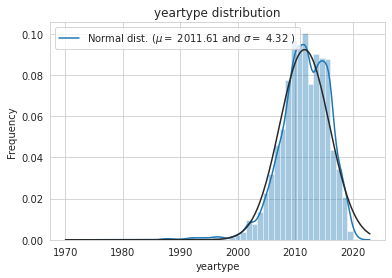

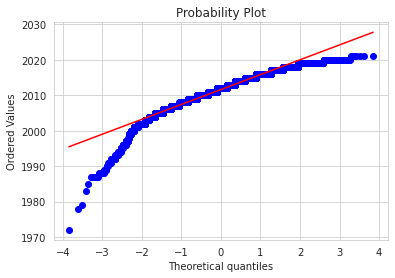


 mu = 100113.27 and sigma = 63347.82



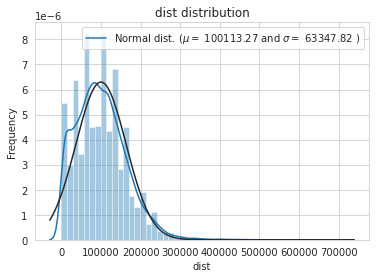

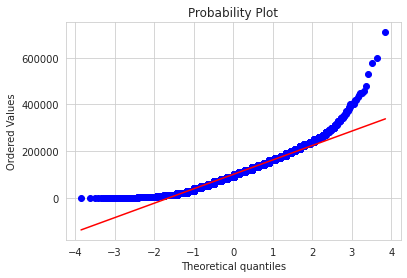


 mu = 188.33 and sigma = 68.41



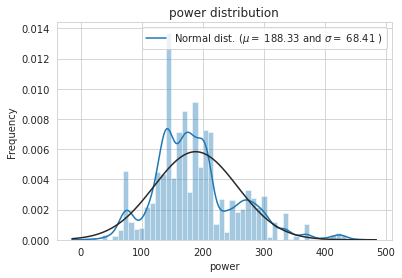

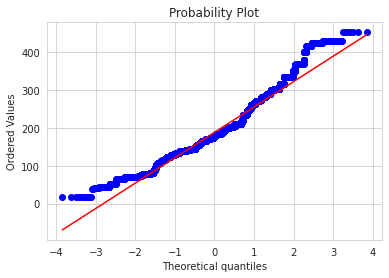


 mu = 30.06 and sigma = 11.17



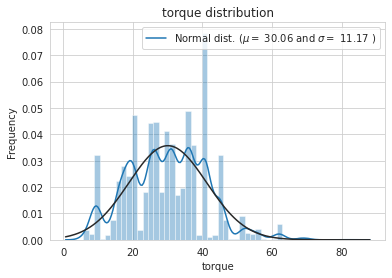

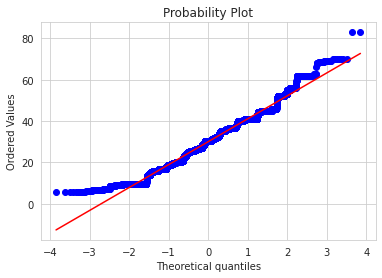

In [80]:
numeric_feats = ['yeartype', 'dist', 'power', 'torque']
for feat in numeric_feats:
  sns.distplot(train[feat], fit=norm)

  # Get the fitted parameters used by the function
  (mu, sigma) = norm.fit(train[feat])
  print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

  #Now plot the distribution
  plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
              loc='best')
  plt.ylabel('Frequency')
  plt.title(f'{feat} distribution')

  #Get also the QQ-plot
  fig = plt.figure()
  res = stats.probplot(train[feat], plot=plt)
  plt.show()

## yeartype은 left-skewed, dist는 right-skewed되어 있다

## boxcox1p를 적용시켜 보자

In [81]:
from scipy.special import boxcox1p
lam = 0.15

train['yeartype'] = boxcox1p(train['yeartype'], lam)
test['yeartype'] = boxcox1p(test['yeartype'], lam)

train['dist'] = boxcox1p(train['dist'], lam)
test['dist'] = boxcox1p(test['dist'], lam)


 mu = 14.20 and sigma = 0.01



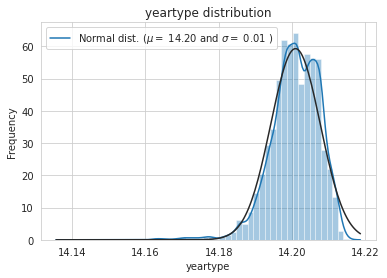

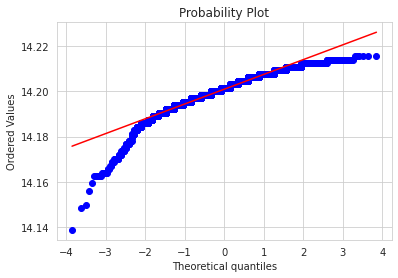


 mu = 29.44 and sigma = 4.92



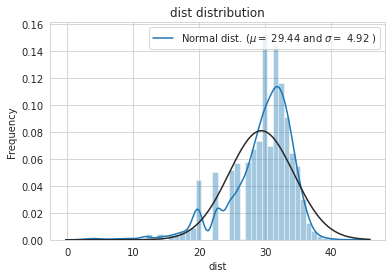

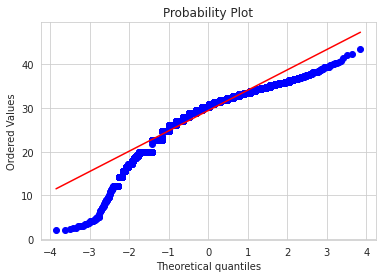

In [82]:
skewed_feats = ['yeartype', 'dist']
for feat in skewed_feats:
  sns.distplot(train[feat], fit=norm)

  # Get the fitted parameters used by the function
  (mu, sigma) = norm.fit(train[feat])
  print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

  #Now plot the distribution
  plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
              loc='best')
  plt.ylabel('Frequency')
  plt.title(f'{feat} distribution')

  #Get also the QQ-plot
  fig = plt.figure()
  res = stats.probplot(train[feat], plot=plt)
  plt.show()

# 데이터 나누기

In [83]:
X_train = train.drop(['price'], axis=1)
Y_train = train['price']
X_test = test.copy()

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)

(11764, 26)
(11764,)
(5789, 26)


# Model

In [103]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [104]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, Y_train.values, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [105]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [106]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [107]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [108]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [109]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [110]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [111]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.5778 (0.0636)



In [112]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.5777 (0.0636)



In [113]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.5509 (0.0653)



In [114]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.4974 (0.0761)



In [115]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.5147 (0.0702)



In [116]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.5219 (0.0718)



## Stacking

In [117]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [118]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.5337 (0.0693)



## More complicated stacking

In [119]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [120]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.4965 (0.0749)


## Ensembling StackedRegressor, XGBoost and LightGBM

In [121]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [122]:
stacked_averaged_models.fit(X_train.values, Y_train.values)
stacked_train_pred = stacked_averaged_models.predict(X_train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(X_test.values))
print(rmsle(Y_train.values, stacked_train_pred))

0.47364204079848526


In [123]:
model_xgb.fit(X_train.values, Y_train.values)
xgb_train_pred = model_xgb.predict(X_train.values)
xgb_pred = np.expm1(model_xgb.predict(X_test.values))
print(rmsle(Y_train.values, xgb_train_pred))

0.46034980969002154


In [124]:
model_lgb.fit(X_train.values, Y_train.values)
lgb_train_pred = model_lgb.predict(X_train.values)
lgb_pred = np.expm1(model_lgb.predict(X_test.values))
print(rmsle(Y_train.values, lgb_train_pred))

0.5146952748732592


In [125]:
'''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(Y_train.values, stacked_train_pred*0.70 + xgb_train_pred*0.15 + lgb_train_pred*0.15 ))

RMSLE score on train data:
0.4732661566977836


# Prediction

In [126]:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15

In [128]:
submission = pd.DataFrame({
    "no": test_no,
    "가격(만원)": ensemble
})
submission.to_csv('/content/drive/My Drive/dg_univ_2020_ml/output/v1.2.3.3.csv', index=False)